In [9]:
import pandas as pd

invoices_df = pd.read_csv(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\fct_invoice (1).csv")
customers_df = pd.read_json(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\dim_customer (1).json")

In [20]:
unique_customers = invoices_df['customer_id'].nunique()
unique_customers

5191

In [12]:
unique_categories = invoices_df['category'].nunique()
unique_categories

8

In [13]:
popular_payment = invoices_df['payment_method'].value_counts().idxmax()
usage_count = invoices_df['payment_method'].value_counts().max()
popular_payment, usage_count

('Cash', 44447)

In [14]:
invoices_df['sales'] = invoices_df['quantity']*invoices_df['price']
popular_categories = invoices_df.groupby('category')['sales'].sum().nlargest(3)
popular_categories

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

In [17]:
import pandas as pd

invoices_df = pd.read_csv(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\fct_invoice (1).csv")
customers_df = pd.read_json(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\dim_customer (1).json")

invoices_df['sales'] = invoices_df['quantity']*invoices_df['price']
merged_df = pd.merge(invoices_df, customers_df, left_on='customer_id', right_on='id')
filtered_df = merged_df[merged_df['age'] > 45]
total_sales = filtered_df['sales'].sum()
print("Total sales attributed to customers over the age of 45:", total_sales)

Total sales attributed to customers over the age of 45: 82039768.15


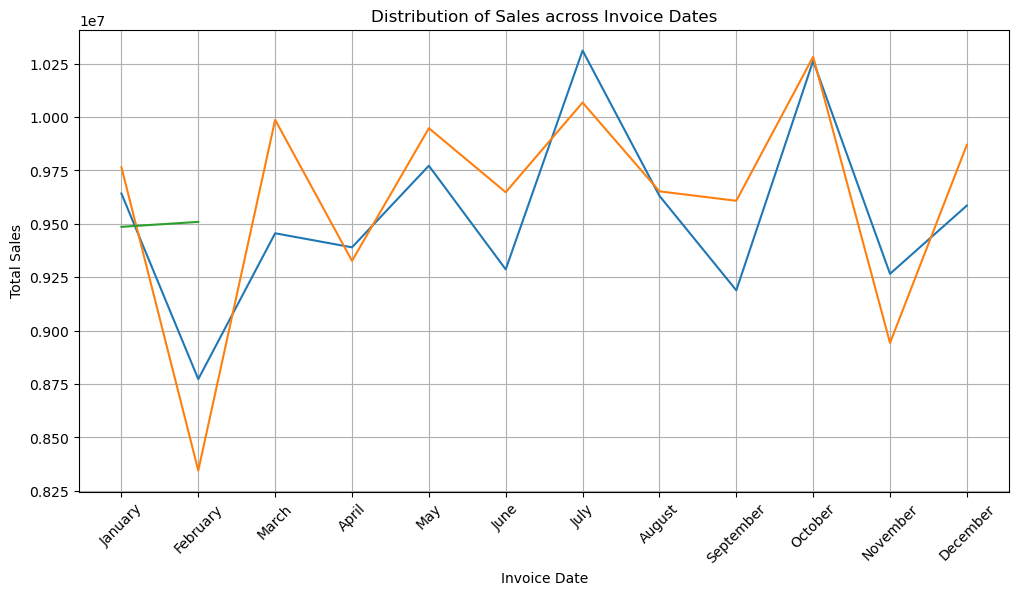

The graph peaks at months July and October while it bottoms usually at month February. Furthermore, the average total sales for most of the months ranges usually from 9.25 million to 10 million.


In [21]:
import matplotlib.pyplot as plt
import pandas as pd

invoices_df = pd.read_csv(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\fct_invoice (1).csv")
customers_df = pd.read_json(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\dim_customer (1).json")

invoices_df['sales'] = invoices_df['quantity']*invoices_df['price']
invoices_df['invoice_date'] = pd.to_datetime(invoices_df['invoice_date'], format='%d/%m/%Y')
invoices_df['year_month'] = invoices_df['invoice_date'].dt.strftime('%Y-%m')
monthly_sales = invoices_df.groupby('year_month')['sales'].sum()
sales = {'2021':[], '2022':[], '2023':[]}
for date in pd.unique(invoices_df['year_month'].sort_values()):
    if date == '2023-03':
        break
    sales[date[:4]].append(monthly_sales.loc[date])

plt.figure(figsize=(12, 6))
plt.plot(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], sales['2021'])
plt.plot(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], sales['2022'])
plt.plot(['January', 'February'], sales['2023'])
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.title('Distribution of Sales across Invoice Dates')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("The graph peaks at months July and October while it bottoms usually at month February. Furthermore, the average total sales for most of the months ranges usually from 9.25 million to 10 million.")

In [23]:
import pandas as pd

invoices_df = pd.read_csv(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\fct_invoice (1).csv")
customers_df = pd.read_json(r"C:\Users\marco\OneDrive\Documents\Ateneo\Second Year\Intercession 2023-2024\ITMGT 25.03\dim_customer (1).json")

invoices_df['sales'] = invoices_df['quantity']*invoices_df['price']
merged_df = pd.merge(invoices_df, customers_df, left_on='customer_id', right_on='id')
merged_df['decade_age_range'] = (merged_df['age'] // 10) * 10
pivot_table = merged_df.pivot_table(values='sales', index='category', columns='decade_age_range', aggfunc='sum')
display(pivot_table)

decade_age_range,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
